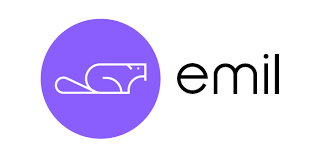

# Visualization Part 2 

 The objective of this TD is: 
 - Create your first widget 
 - Add interactivity elements to a Plotly graphic 
 - Trash the interactive visualization notebook in webapp (web application) with here 
 - Deploy and share this web application with Ngrok

# 1) Creation of a first widget

a) Installation of the Pywi bookstore

In [ ]:
import sys
!{sys.executable} -m pip install ipywidgets statsmodels

b) Perform the code below to import the bookstore and rename it widgets. We will use

In [ ]:
import ipywidgets as widgets
from IPython.display import display

c) La liste complète des widgets disponible est disponible à [cette adresse](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html).

A l'aide de cette documentation, construisez une variable `my_int_slider` qui contiendra un widget "IntSlider" avec 5 comme valeur par défaut, 1 en minimum et 20 en maximum. On pourra laisser step égal à 1 comme niveau d'incrément.

Utilisez la fonction "display" pour l'afficher.
        

In [ ]:
my_int_slider = # à compléter

display(my_int_slider)

d) What does the result of this operation correspond to?

In [ ]:
my_int_slider.keys

e) Deduce how to display the value of the Slider. 

 Vary the value of the slider and check that by performing the line of code again, the value has changed well.

In [ ]:
# à compléter

# 2) Creation of an User Form

Widgets can be used to create user forms for end users. 

 The purpose of this exercise is to build a tool that allows you to select to select a stock market index to display a scatter plot with the AAPPL Apple index.

a) Import the following bookstores

In [ ]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact, interactive, fixed, interactive_output
import io

b) In a variable `my_upload_widget`, create a Fileupload type widget which accepts the .csv extension and a single file at a time. Then test the import of this file [CSV Example] (https://drive.google.com/file/d/1bwmyhbp6pnxb-szttyre8gmszd0gop4/view?usp=sharing).

In [ ]:
my_upload_widget = # à compléter

display(my_upload_widget)

c) The output data is a bit difficult to extract. 

 Run the code below to save time and ask your questions to the teacher.

In [ ]:
df = pd.read_csv(io.BytesIO(list(my_upload_widget.value.values())[0]["content"]))
df

d) Present in a Plotly scatter graphic the data from Goog Versus App with a trend curve (trendlines = 'ols') to see the correlation between these two indices.

In [ ]:
fig = # à compléter
fig.show()

e) Create a FINANCE_SCATTER_WIDGET 'function which will take the DF, X and Y parameters as input, it will display the graphic created previously for column names X and Y.

In [ ]:
def financial_scatter_widget(df, x=None, y=None):
    # à compléter

financial_scatter_widget(df, x="GOOG", y="AAPL")

f) The idea is to give the user's hand to choose which index he wishes to check the correlation with the App. 

 Create a Dropdown type widget, which will select the name of a column of the Dataframe created.

In [ ]:
x_dropdown = widgets.Dropdown(
    options=# à compléter,
    value='AAPL',
    description='AAPL vs ',
    style= {'description_width': 'initial'},
    disabled=False,
)
display(x_dropdown)

g) Using the Interact () `Widgets function, have the function` Financial_Scatter_Widget` as a function of the chosen column. 

 We will fix the parameters `Df` = the recovered dataframa of the upload and` y '= "app" using the fixed () function.

In [ ]:
widgets.interact(
    # à compléter
)

# 3) Creation of the restaurateur dashboard

We will resume the visualizations made at the last TP and add two interaction elements, the restaurant ID and the dates of the selected period.

a) We will resume data from the previous TP. If necessary, you can again download them to [this address] (https://drive.google.com/file/d/1x5uxvfrl7sumuke7cjaicgeohokorh2/view?usp=sharing).

b) Execute the following data of data preprocessing.

In [ ]:
df = pd.read_csv("Tiller_order_data.csv")

# Transforme les dates en format datetime
df["date_opened"] = pd.to_datetime(df["date_opened"])
df["date_closed"] = pd.to_datetime(df["date_closed"])

# Mettre en index la date d'ouverture de commande
df = df.set_index(df["date_opened"])

In [ ]:
df

c) Perform the code below which determines the Restaurant ID and the dates of the desired period. These are the parameters that we will make selectable thanks to the widgets.

In [ ]:
id_store = 8052
date_debut = "2019-10-01"
date_fin = "2021-12-31"

df_store = df[(df.id_store == id_store) & (df.date_opened >= date_debut) & (df.date_closed < date_fin)]
df_store.shape

d) Change the previous code using two widgets, a dropdown menu to choose the restaurant and a picker date to choose the start and end date of the period you want to analyze.

Create the variable `Id_Store_dropdown 'with a Dropdown type widget:

In [ ]:
id_store_dropdown = widgets.Dropdown(
    # à compléter
)

In [ ]:
display(id_store_dropdown)

Create the variable `Date_debut_picker 'with a DatePicker type widget:

In [ ]:
date_debut_picker = widgets.DatePicker(
    # à compléter
)

In [ ]:
display(date_debut_picker)

Create the variable `Date_fin_picker 'with a DatePicker type widget:

In [ ]:
date_fin_picker = widgets.DatePicker(
    # à compléter
)

In [ ]:
display(date_fin_picker)

e) Perform the following code to transform all the visualizations made to the previous TP in functions

In [ ]:
import plotly.graph_objects as go

def revenue_over_time(df_store):
    df_revenue = df_store[df_store.dim_status=="CLOSED"].resample("D").m_cached_payed.sum()

    fig = px.line(df_revenue,
                  y="m_cached_payed",
                  title="Chiffre d'affaire au cours du temps")
    fig.update_xaxes(
        rangeselector=dict(
            buttons=list([
                dict(count=7, label="Last 7days", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
    )
    fig.show()

def clients_over_time(df_store):
    df_revenue = df_store[df_store.dim_status=="CLOSED"].resample("D").m_cached_payed.sum()
    df_nb_customer = df_store[df_store.dim_status=="CLOSED"].resample("D")["m_nb_customer"].sum()

    df_average_basket = df_revenue / df_nb_customer

    fig_panier_moyen = go.Scatter(x=df_average_basket.index,
                                  y=df_average_basket,
                                  name="panier moyen",
                                  mode="lines",
                                  line_color="#000000")

    fig = px.bar(df_nb_customer,
                 title="Nombre de clients au cours du temps")
    fig.add_trace(fig_panier_moyen)
    fig.update_xaxes(tickformat="%d/%m/%Y")
    fig.update_xaxes(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        )
    )
    fig.show()

def best_staff(df_store):
    df_store.loc[df_store["id_waiter"].isnull(), "id_waiter"] = "unknown"

    df_waiter = df_store.groupby("id_waiter", as_index=False)["m_cached_payed"].sum()

    fig = px.pie(
        df_waiter,
        names='id_waiter',
        values='m_cached_payed',
        color='id_waiter',
        title = 'Répartition des commandes non enregistrées par un serveur'
    )
    fig.update_traces(
        textinfo='percent+label'
    )
    fig.show()

f) Interact the previously created widgets, via the 'Interact' function, with the 'Display_Dash' function. 

 This 'Display_Dash' function filters the initial data according to the values specified in the three widgets, and then calls the visualizations above to display them from the filtered dataframa. 

 You must therefore, in this function 'Display_dash': 
 - Filter the Dataframe Iniitial (DF) as a function of the values of the widgets id_store_dropdown, date_debut_picker and date_fin_picker 
 - Call the duties returned_over_time, customers_over_time and best_staff

In [ ]:
def display_dash(df, id_store_dropdown, date_debut_picker, date_fin_picker):
    df_filtered = # à compléter
    # Appel des fonctions revenue_over_time, clients_by_time et best_staff :
    # à compléter

In [ ]:
out = interactive_output(
    display_dash,
    {
        'df': fixed(df),
        'id_store_dropdown': id_store_dropdown,
        'date_debut_picker': date_debut_picker,
        'date_fin_picker': date_fin_picker
    }
)
display(ui, out)

g) Organize your dashboard using HBOX and VBOX from the Widgets bookstore. 

 They make it possible to manage the arrangement of the different visualizations: 
 - Place the widget on the first line: id_store_dropdown 
 - Place on the second line the widgets Date_debut_picker and Date_fin_picker

In [ ]:
from ipywidgets import HBox, VBox

In [ ]:
ui = # à compléter

In [ ]:
ui

h) Now use the function ['interactive_output'] (https://ipywidgets.readthedocs.io/en/latest/example/using%20interact.html#more-control-over-ser-user-interface:-interactive_output). 
 This function allows you to be more flexible on the layout of the widgets.

In [ ]:
out = interactive_output(
    # à compléter
)
display(ui, out)

i) Check that everything works well by changing the restaurant ID and the dates of the period. 
 If everything works, well done you created your first dashboard under Python!

# 4) Transformation of the notebook in web application with here

Now that we have all the elements for our user dashboard, we will convert our notebook into a web application so that we can execute it locally and be able to interract with the elements.

a) Start by installing [voila] (https://github.com/voila-dashboards/voila)

In [ ]:
import sys
!{sys.executable} -m pip install voila

b) Mark all the cells to keep only the cells of exercise 3, in order to display only the dashboard of this part. 

 To do this, you will have to tag the cells beforehand with a tag name. We will choose the tag `hide` in this example. 

 To do this, click on "Display" -> "cell toolbar" -> "tags" 

 (Ah ... wait, it's already done! We save you time)

c) From a terminal, launch the command: 
 `` ` 
 Here is -TagremovePreProcessor.remove_Cell_tags hide CE_NoteBook.ipynb 
 `` `

# 5) deployment of the Webapp with Ngrok

We now want to be able to share our Webapp without deploying it on a server on another computer. 

 To do this, we will use the Ngrok bookstore, the documentation of which can be consulted at [this address] (https://voila.readthedocs.io/en/stable/deploy.html). But we will guide you in the rest of this part.

a) Installer [ngrok](https://ngrok.com/download)

https://ngrok.com/download

b) Unzippe the archive, then authenticate yourself with your token: 

 `` `./ngrok Authtoken <token>` ``

c) Make sure that a webapp here is already launched locally (see: order here above) above)

d) Launch a tunnel on port 8866: 

 `` `./ngrok http 8866 '' '

e) Click on the link displayed in the terminal (`` forwarding '' '). 
 You can send this URL to your neighbor, it can access your Webapp!

# [Bonus] Deployment of a Webapp with Binder 

 To be able to use [Binder] (https://jupyter.org/binder), you must first have been pushed on your notebook in a resume and have added a 'requirements.txt' file containing the bookstores necessary to run your project. 

 Then just go to https://mybinder.org/ and: 
 - In 'GitHub', copy paste the URL of your Git project 
 - In 'path to a notebook file (optional)', write 'voila/render/ce_notebook.ipynb', specifying well 'url' instead of 'file'. This makes it possible to specify to Binder that you have to use directly here to create the Webapp. 

 Then click on 'Lauch'. A docker image of your project will be created thanks to the 'requirements.txt' file. You will then have a link to launch an autonomous Docker container that will allow you to access your web application. For each user using this link, a docker container will be created.